In [1]:
# Uses Co-integration 

import pandas as pd 
import numpy as np 
import statsmodels 
import statsmodels.api as sm 
from statsmodels.tsa.stattools import coint
import yfinance as yf
import matplotlib.pyplot as plt 


In [2]:
Stock1 = yf.download("SPY",start = "2008-01-01" ,end = "2023-03-29")
Stock2 = yf.download("QQQ",start = "2008-01-01" ,end = "2023-03-29")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


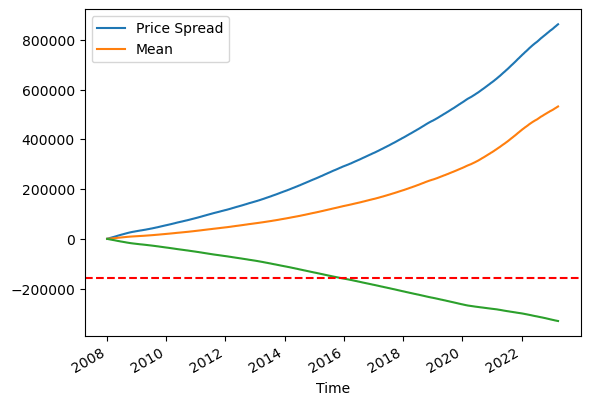

In [5]:
X_returns = Stock1["Close"]
Y_returns = Stock2["Close"]

X = pd.Series(np.cumsum(X_returns), name = "X")
Y = pd.Series(np.cumsum(Y_returns), name = "Y")

(X).plot() 
(Y).plot()
(Y-X).plot() # plot the spread 
plt.axhline((Y-X).mean(), color = 'red', linestyle = "--") # add the mean 
plt.xlabel("Time")
plt.legend(["Price Spread", "Mean"]);

In [ ]:
#compute the p-value of the cointegration test
# will inform us as to whether the spread between the 2 timeseries is stationary 
# around its means 

score, pvalue, _ = coint(X,Y)
if pvalue < 0.05: #? This is important for statisctics to show the number must reach over a certain threshold 
    print(f"{pvalue} | Likey Cointegrated")  
else:
    print(print(f"{pvalue}  | Not Likely Cointegrated")  )
    
    
print("Correlation:" + str(X_returns.corr(Y_returns)))
score, pvalue, _ = coint(X_returns,Y_returns)
print("Cointegration test pvalue: " + str(pvalue))